# OpenAI API in CoCalc

1. Sign up to [OpenAI](https://platform.openai.com/) and get your [API key](https://platform.openai.com/account/api-keys).
2. Open CoCalc's Project Settings and scroll to the "Custom environment variables" section. Add your key there like:
    ```
    {
      "OPENAI_API_KEY": "sk-1942.......................AWEf"
    }
    ```

3. Restart your project to make that environment variable be set.

Load some packages, `openapi` is already installed …

In [1]:
import os
from IPython.display import Markdown
import openai # already installed
import pkg_resources
pkg_resources.get_distribution('openai').version

'0.27.2'

Load your API key from that environment variable



In [2]:
openai.api_key = os.getenv("OPENAI_API_KEY")

## Quick test, completing a prompt



In [3]:
prompt = """\
Tell me 5 cool things I can do with the programming language Python:
"""

response = openai.Completion.create(model="text-davinci-003",
                                    prompt=prompt,
                                    temperature=.7,
                                    max_tokens=100)

print(response["choices"][0]["text"])


1. Build web applications with frameworks like Django and Flask.
2. Create powerful data analysis applications with libraries like Pandas and NumPy.
3. Develop GUI programs for desktop and mobile devices using Tkinter and PyQt.
4. Create games with the Pygame library.
5. Use Python to automate tedious tasks with its powerful scripting capabilities.


## Chatting with GPT\-4

As of today, you need to have access to this model…


In [4]:
answer = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[{
        "role":
        "system",
        "content":
        "Formulate your answer to a student at a university, who knows a bit of Python."
    }, {
        "role":
        "user",
        "content":
        "Show me how to plot this sequence of numbers in Python and extrapolate it a little bit using statsmodels: 2, 3, 15, 14, 9.2, 11, 9, 12.1, 15, 16"
    }])

answer["choices"]

[<OpenAIObject at 0x7f0aa4d3e250> JSON: {
   "finish_reason": "stop",
   "index": 0,
   "message": {
     "content": "To plot the given sequence of numbers and extrapolate it using the statsmodels library, you can use the following steps:\n\n1. Install the required libraries: statsmodels and matplotlib (if you haven't done so)\n2. Import the required libraries and functions.\n3. Load the data.\n4. Fit the model using statsmodels' SARIMAX function.\n5. Predict the extrapolated values.\n6. Plot the results.\n\nHere's the code:\n\n```python\n# Step 1: Install libraries (run this line in your command line, not in the Python file)\n# pip install statsmodels matplotlib\n\n# Step 2: Import required libraries and functions\nimport numpy as np\nimport matplotlib.pyplot as plt\nimport statsmodels.api as sm\n\n# Step 3: Load the data\ndata = np.array([2, 3, 15, 14, 9.2, 11, 9, 12.1, 15, 16])\n\n# Step 4: Fit the model (SARIMAX)\n# Order and seasonal_order parameters are (p, d, q) and (P, D, Q, s)

### Neatly display the answer using IPython's `Markdown` object

In [5]:
Markdown(answer["choices"][0]['message']["content"])

To plot the given sequence of numbers and extrapolate it using the statsmodels library, you can use the following steps:

1. Install the required libraries: statsmodels and matplotlib (if you haven't done so)
2. Import the required libraries and functions.
3. Load the data.
4. Fit the model using statsmodels' SARIMAX function.
5. Predict the extrapolated values.
6. Plot the results.

Here's the code:

```python
# Step 1: Install libraries (run this line in your command line, not in the Python file)
# pip install statsmodels matplotlib

# Step 2: Import required libraries and functions
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Step 3: Load the data
data = np.array([2, 3, 15, 14, 9.2, 11, 9, 12.1, 15, 16])

# Step 4: Fit the model (SARIMAX)
# Order and seasonal_order parameters are (p, d, q) and (P, D, Q, s) respectively, chosen by trial and error
# Here, we use an ARIMA model with order (1, 0, 0), which means 1 autoregressive, 0 differencing and 0 moving average component
model = sm.tsa.SARIMAX(data, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
results = model.fit()

# Step 5: Predict the extrapolated values (here, we extrapolate 5 new values)
extrapolate_steps = 5
predictions = results.get_prediction(start=len(data), end=len(data) + extrapolate_steps - 1, dynamic=True)

# Step 6: Plot the results
plt.plot(data, label='Original data')
plt.plot(np.arange(len(data), len(data) + extrapolate_steps), predictions.predicted_mean, label='Extrapolated data')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.show()
```

This code will generate a plot showing the original data and the extrapolated data using an ARIMA model from the statsmodels library. Note that you might need to adjust the ARIMA model's order and seasonal_order parameters depending on your specific time series.

### … and now copy/paste/adapt the provided code snippet

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.57356D+00    |proj g|=  5.18269D+00

At iterate    5    f=  3.03758D+00    |proj g|=  3.61441D-02

At iterate   10    f=  3.02871D+00    |proj g|=  3.68434D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     10     11      1     0     0   3.684D-06   3.029D+00
  F =   3.0287137752620881     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


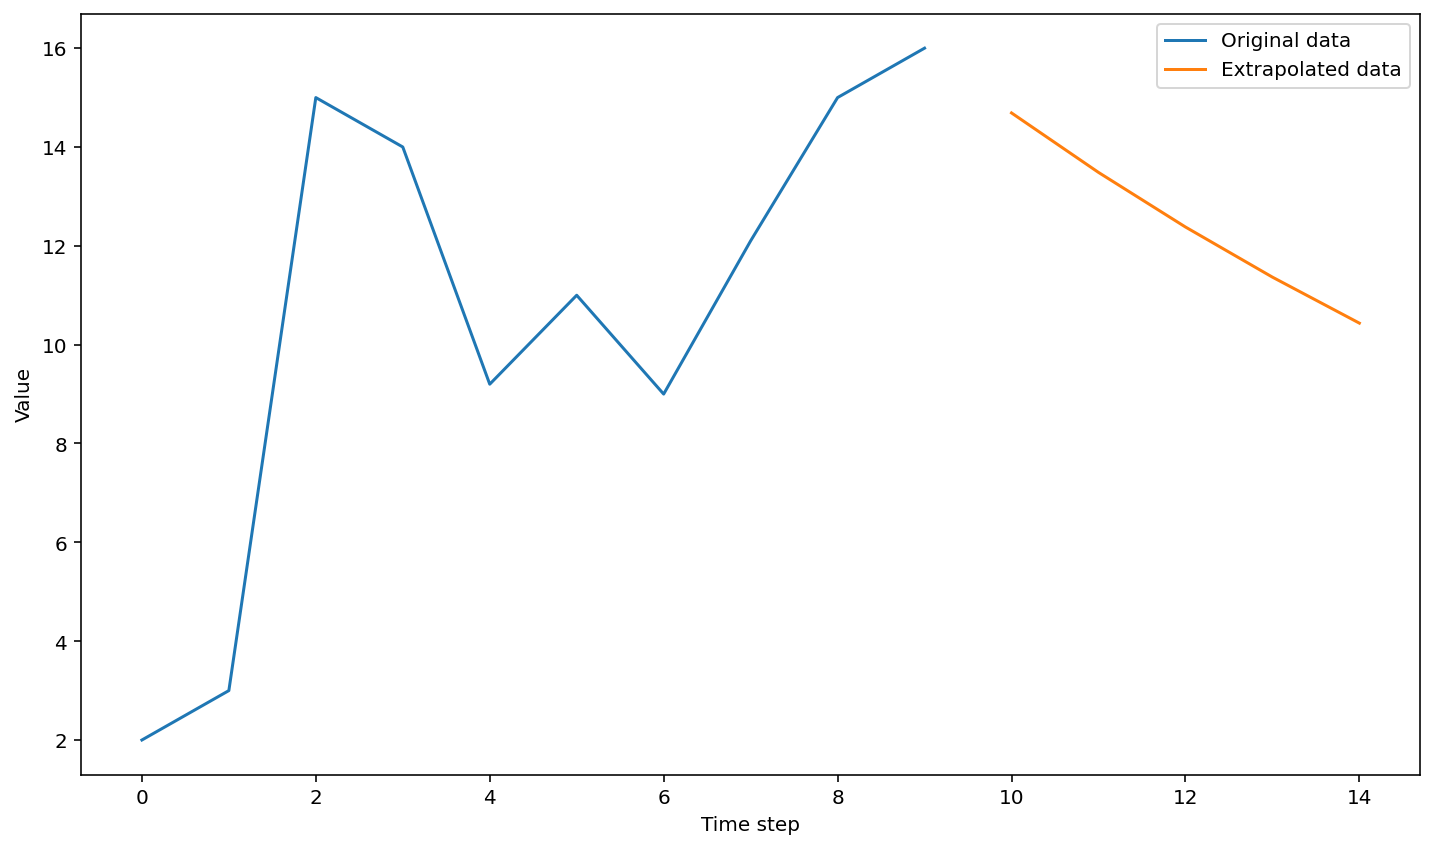

In [7]:

# Step 2: Import required libraries and functions
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Step 3: Load the data
data = np.array([2, 3, 15, 14, 9.2, 11, 9, 12.1, 15, 16])

# Step 4: Fit the model (SARIMAX)
# Order and seasonal_order parameters are (p, d, q) and (P, D, Q, s) respectively, chosen by trial and error
# Here, we use an ARIMA model with order (1, 0, 0), which means 1 autoregressive, 0 differencing and 0 moving average component
model = sm.tsa.SARIMAX(data, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
results = model.fit()

# Step 5: Predict the extrapolated values (here, we extrapolate 5 new values)
extrapolate_steps = 5
predictions = results.get_prediction(start=len(data), end=len(data) + extrapolate_steps - 1, dynamic=True)

# Step 6: Plot the results
plt.plot(data, label='Original data')
plt.plot(np.arange(len(data), len(data) + extrapolate_steps), predictions.predicted_mean, label='Extrapolated data')
plt.xlabel('Time step')
plt.ylabel('Value')
plt.legend()
plt.show()